# Expectation Maximization (Mixture of Gaussians in 1D)

**[Faisal Z. Qureshi](http://vclab.science.uoit.ca)**  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def gaussian1d(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [3]:
def plot_mog(mog, x_values):
    for mu, sig, num, c in mog:
        plt.plot(x_values, gaussian1d(x_values, mu, sig), c)

**Define a GMM**

In [4]:
mixture_of_gaussians = [(-19, 1, 6, 'r'), (-1, 1, 0.3, 'g'), (15, 2, 0.5, 'b')]
x_values = np.linspace(-30, 30, 120)

**Generate some data from a mixture of Gaussians**

In [5]:
K = len(mixture_of_gaussians)
a = np.empty(K)
a = [mixture_of_gaussians[k][2] for k in range(K)]
    
N = 5
x = np.empty(N)
for i in range(N):
    k = np.random.choice(K, 1, a)[0]
    mu, sig, _, _ = mixture_of_gaussians[k]
    x[i] = np.random.normal(mu, sig, 1)

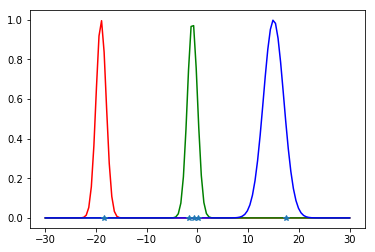

In [6]:
plot_mog(mixture_of_gaussians, x_values)
plt.plot(x,np.zeros(x.shape),'*')

## Expectation Maximization

Initialization

In [7]:
def em_init(x, K):
    c = ['r', 'g', 'b']
    
    N = len(x)
    
    mog_estimate = []
    for k in range(K):
        mog_estimate.append((np.random.uniform(-20,20),np.random.uniform(1,3),1./K,c[k%3]))
        
    w = np.empty([N, K])
    return mog_estimate, w

E Step

In [8]:
def e_step(x, mog_estimate):
    N = len(x)
    K = len(mog_estimate)
    
    for i in range(N):
        for k in range(K):
            mu, sig, alpha, _ = mog_estimate[k]
            w[i,k] = gaussian1d(x[i], mu, sig) * alpha
        w[i,:] /= np.linalg.norm(w[i,:])
    return w

M Step

In [9]:
def m_step(x, mog_estimate, w):
    Nk = np.sum(w,0)
    K = len(mog_estimate)
    
    print('Nk', Nk)
    for k in range(K):
        new_alpha = Nk[k]/N
        print(k, new_alpha)
        new_mean = np.dot(w[:,k], x)/Nk[k]
        new_sigma = np.sqrt(np.dot(w[:,k], np.square(x - new_mean))/Nk[k])
        mog_estimate[k] = (new_mean, new_sigma, new_alpha, mog_estimate[k][3])
    return mog_estimate

**EM in action**

Using matplotlib backend: MacOSX
Nk [0.99696148 0.07826091 4.0000023 ]
0 0.19939229544454534
1 0.015652182326139318
2 0.800000459173166
Nk [0.99563188 0.07797394 4.05135397]
0 0.1991263754505389
1 0.015594787665215007
2 0.8102707934264048


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


Nk [nan nan nan]
0 nan
1 nan
2 nan
Nk [nan nan nan]
0 nan
1 nan
2 nan
Nk [nan nan nan]
0 nan
1 nan
2 nan
Nk [nan nan nan]
0 nan
1 nan
2 nan


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


KeyboardInterrupt: 

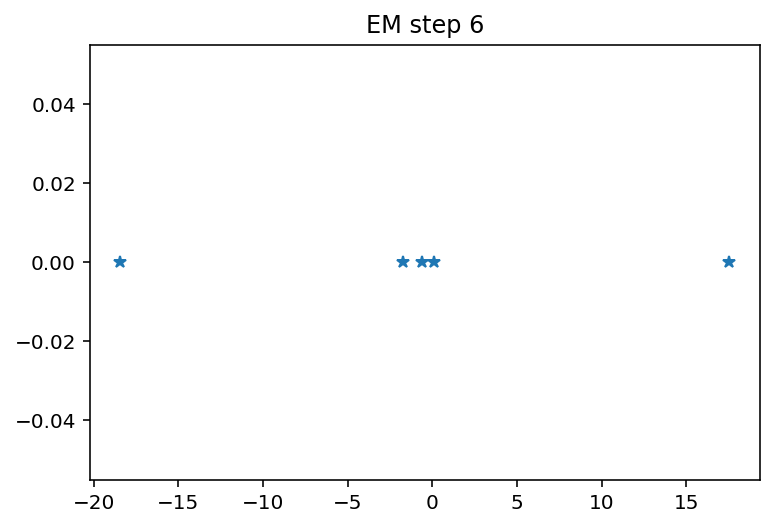

In [10]:
%matplotlib auto
plt.ion()

em_steps = 10
mog_estimate, w = em_init(x, 3)

plt.figure(1)
for s in range(em_steps):
    plt.clf()
    plot_mog(mog_estimate, x_values)
    plt.plot(x,np.zeros(x.shape),'*')
    plt.title('EM step %s' % s)
    plt.pause(5)
    w = e_step(x, mog_estimate)
    mog_estimate = m_step(x, mog_estimate, w)

In [11]:
plt.figure(1)
plt.close()